### Assignment 2 - Iteration 2

![Nightingale](images/nightingale.png)

After the first iteration I decided to use the data in the class shared drive. Along with some the code that was share with us to help make the visual dashboard. I recreated the charts I used in iteration 1 with this new data. I also used the coding from the Nightinggale python notebook file in the class shared drive to help design the coxcombs I would use for a potential dashboard. I decided if I was going to keep the stacked bar charts along with coxcombs because it may help some of the potential audience navigate the data better since they are more simple to navigate then the coxcombs are sometimes. Both the coxcomb and the stacked bar chart in plotly add more interativity and depth the original data because you can actually go to a certain month of data and to show the causes of death among British soldiers during the Crimean War. Through plotly I can make even clearer the point Florence Nightingale was trying to get across to her peers which is that the that poor sanitation (disease)  and not battle wounds was killing most soldiers.

In [14]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots



nightingdata = pd.read_csv("data/nightingale.csv")


# Select the particular date range we'll use
# Diagram 1 (on the right of Nightingale's original) displays data from April 1854 to March 1855
nightingdata1 = nightingdata[nightingdata['Date']<'1855-04-01']

# Sort according to Date (just to be on the safe side)
nightingdata1.sort_values(by=['Date'],inplace=True)
nightingdata1

/var/folders/qm/1n2xg7v13r58v47g5jl87c800000gn/T/ipykernel_71817/1575798247.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
0,1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
1,2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
2,3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
3,4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
4,5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9
5,6,1854-09-01,Sep,1854,30290,788,81,70,312.2,32.1,27.7
6,7,1854-10-01,Oct,1854,30643,503,132,128,197.0,51.7,50.1
7,8,1854-11-01,Nov,1854,29736,844,287,106,340.6,115.8,42.8
8,9,1854-12-01,Dec,1854,32779,1725,114,131,631.5,41.7,48.0
9,10,1855-01-01,Jan,1855,32393,2761,83,324,1022.8,30.7,120.0


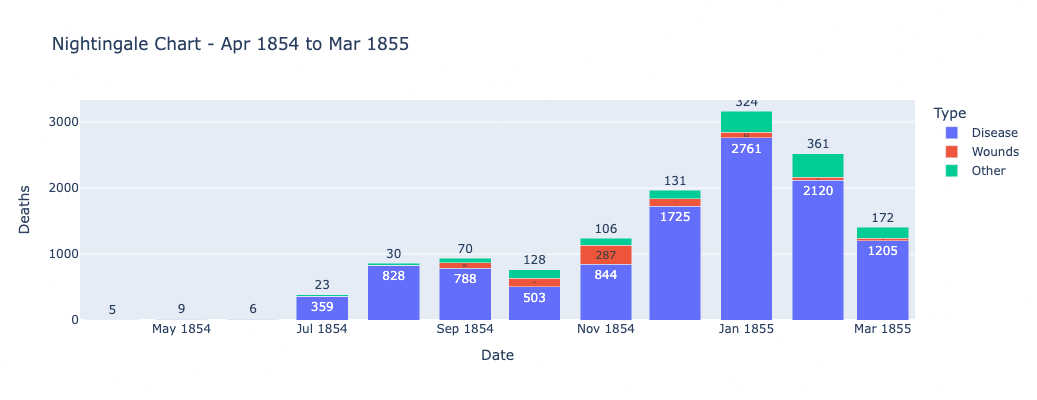

In [15]:
#using the melt function to get one column for category name
Nightviz = nightingdata1.melt(
    id_vars=['Date', 'Month', 'Year', 'Army'],
    value_vars=['Disease', 'Wounds','Other'],     # Grouping the types together
    var_name='Type',
    value_name='Deaths'
)

fig = px.bar(
    Nightviz,
    x='Date',
    y='Deaths',
    color='Type',
    title='Nightingale Chart - Apr 1854 to Mar 1855',
    hover_data=['Type', 'Army']
)

fig.update_layout(
    width=800, 
    height=400,
    barmode='stack'  
)
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()


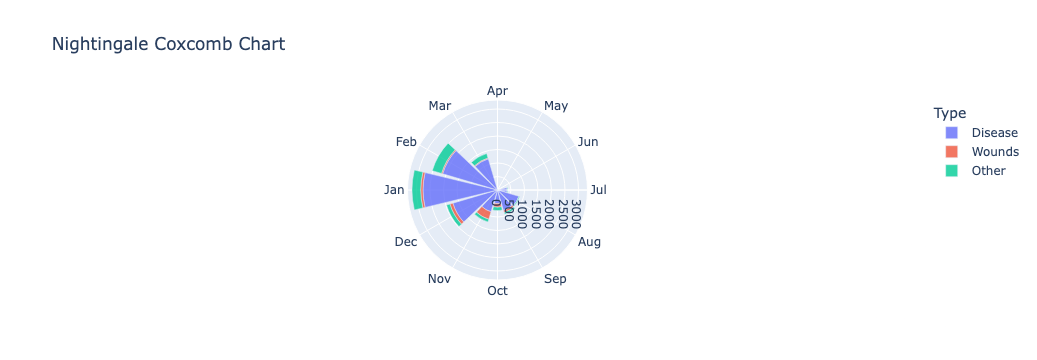

In [16]:
#Playing with some different coxcombs before using the example we got given

fig = px.bar_polar(
    Nightviz,
    r="Deaths",          
    theta="Month",      
    color="Type",      
    title="Nightingale Coxcomb Chart",
    
)

fig.update_layout(
   # matches your theme
    polar=dict(
        radialaxis=dict(showticklabels=True, ticks=''),
        angularaxis=dict(direction='clockwise')  
    )
)
fig.update_traces(opacity=0.8)
fig.update_layout(showlegend=True)
fig.show()




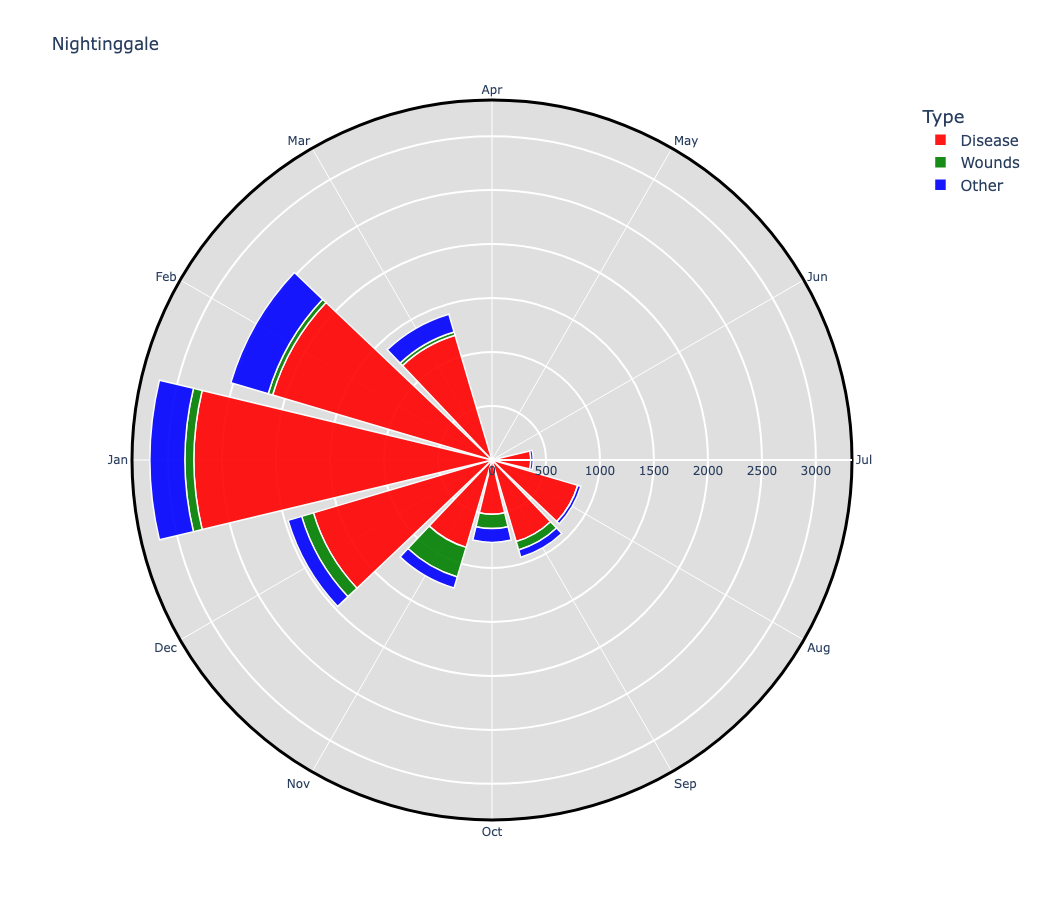

In [17]:
fig = px.bar_polar(
    Nightviz,                 # melted dataframe
    r="Deaths",               #
    theta="Month",            # polar angle by month
    color="Type",             # category column
    title="Nightingale Coxcomb Chart",
    color_discrete_sequence=["red", "green", "blue"]
)

fig.update_traces(
    marker_line_color="white",
    marker_line_width=1.5,
    opacity=0.9
)

fig.update_layout(
    title='Nightinggale',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=90,
    width=900,
    height=900,
    polar=dict(
        bgcolor="rgb(223, 223, 223)",
        angularaxis=dict(
            linewidth=3,
            showline=True,
            linecolor='black'
        ),
        radialaxis=dict(        
            showline=True,
            linewidth=2,
            gridcolor="white",
            gridwidth=2
        )
    )
)

fig.show()


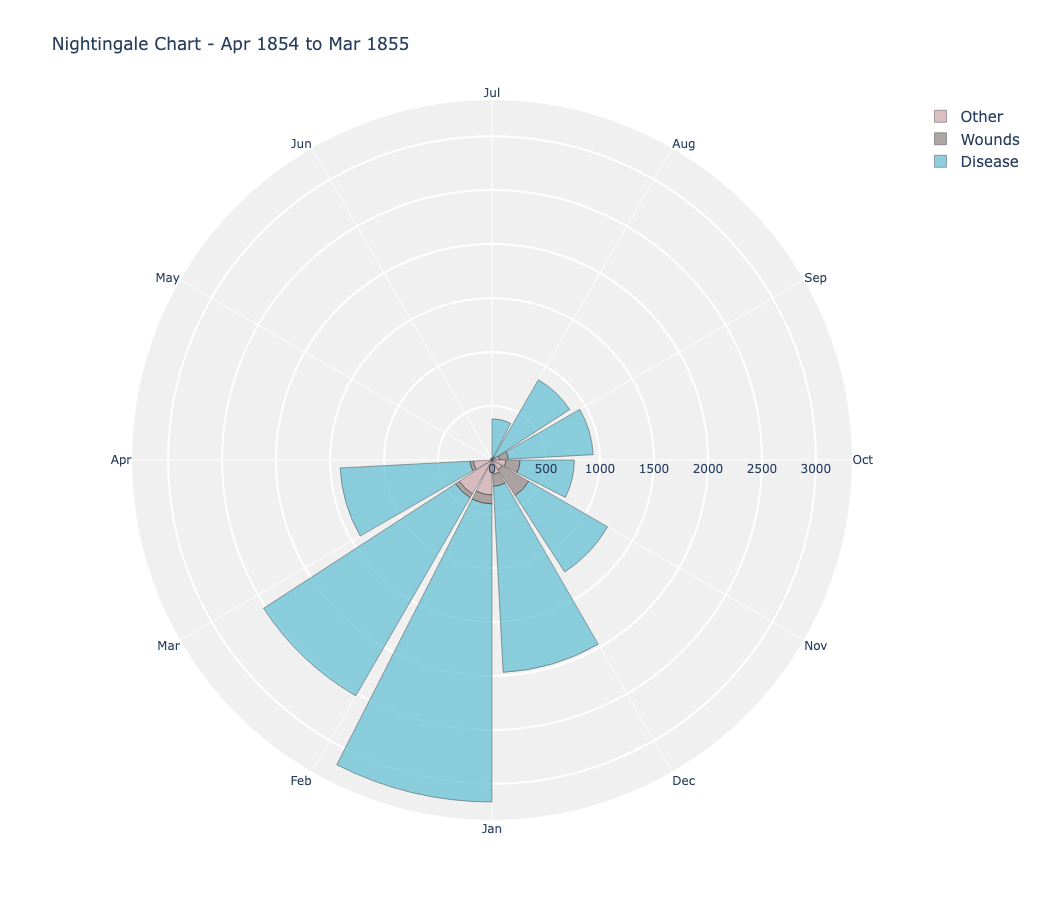

In [18]:
# These are the parameters for the Plotly visualization

#fig = make_subplots()
fig = go.Figure()

# This "trace" will display the "other" data
fig.add_trace(go.Barpolar(
    r = list(nightingdata1['Other']),
    theta=list(nightingdata1['Month']),
    offset=12,
    name = 'Other',
    marker_color='rgb(204,164,168)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

# This "trace" will display the "wounds" data
fig.add_trace(go.Barpolar(
    r = list(nightingdata1['Wounds']),
    theta=list(nightingdata1['Month']),
    offset=12,
    name = 'Wounds',
    marker_color='rgb(141,127,127)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

# This "trace" will display the "disease" data
fig.add_trace(go.Barpolar(
    r = list(nightingdata1['Disease']),
    theta=list(nightingdata1['Month']),
    offset=12,
    name = 'Disease',
    marker_color='rgb(93,188,210)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

# This code is responsible for the layout of your figure
# (remember the Matplotlib "Anatomy of a Figure" at https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)
# Plotly builds on it
fig.update_layout(
    title='Nightingale Chart - Apr 1854 to Mar 1855',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=180,
    width=900,
    height=900,

    polar = dict(
        bgcolor = "rgb(240,240,240)",
        angularaxis =
                dict(
                    linewidth = 3,
                    showline=False,
                    direction = "clockwise",
                    linecolor='black'
                    ),
        radialaxis =
                dict(
                    showline = False,
                    linewidth = 2,
                    gridcolor = "white",
                    gridwidth = 2,
                    )
                ),
            )
#plotly.offline.plot(fig, filename='nightingale.html')
fig.show()

In [19]:
nightingdata2 = nightingdata[nightingdata['Date']>='1855-04-01']
nightingdata2

,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
12,13,1855-04-01,Apr,1855,32252,477,48,57,177.5,17.9,21.2
13,14,1855-05-01,May,1855,35473,508,49,37,171.8,16.6,12.5
14,15,1855-06-01,Jun,1855,38863,802,209,31,247.6,64.5,9.6
15,16,1855-07-01,Jul,1855,42647,382,134,33,107.5,37.7,9.3
16,17,1855-08-01,Aug,1855,44614,483,164,25,129.9,44.1,6.7
17,18,1855-09-01,Sep,1855,47751,189,276,20,47.5,69.4,5.0
18,19,1855-10-01,Oct,1855,46852,128,53,18,32.8,13.6,4.6
19,20,1855-11-01,Nov,1855,37853,178,33,32,56.4,10.5,10.1
20,21,1855-12-01,Dec,1855,43217,91,18,28,25.3,5.0,7.8
21,22,1856-01-01,Jan,1856,44212,42,2,48,11.4,0.5,13.0


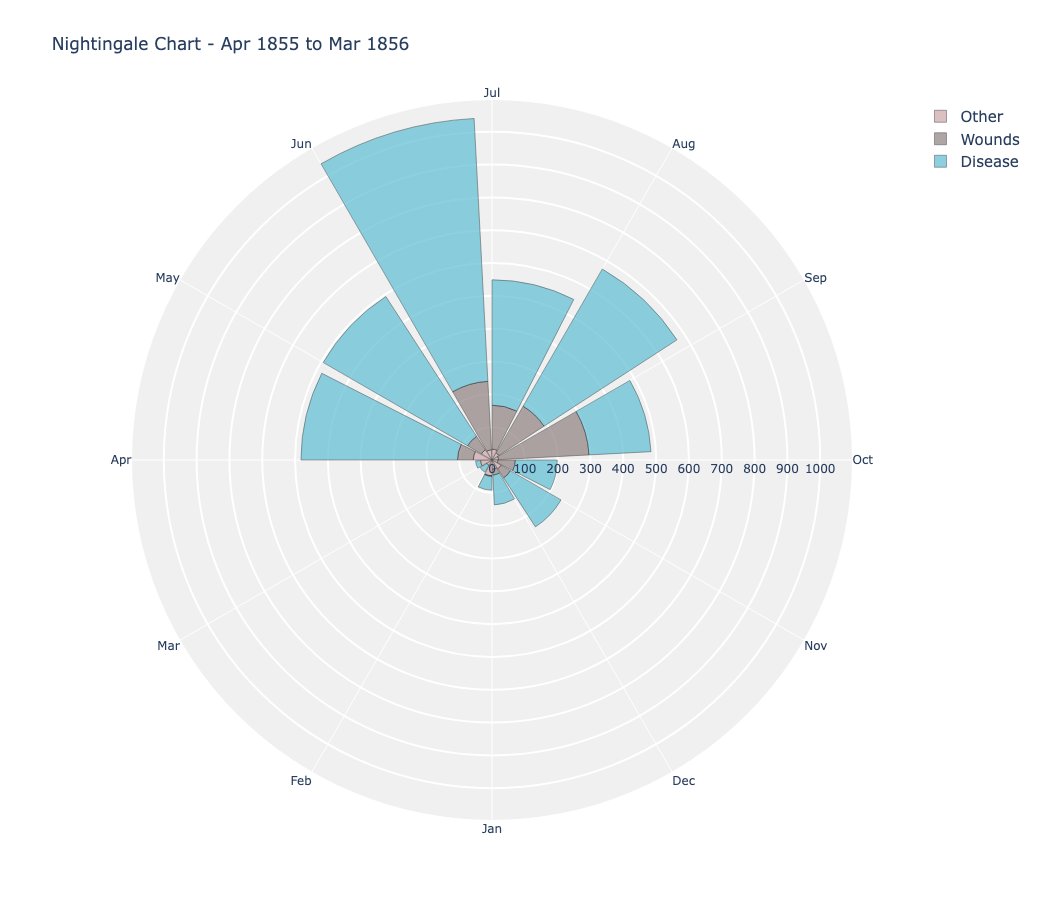

In [20]:
# These are the parameters for the Plotly visualization

#fig = make_subplots()
fig = go.Figure()

# This "trace" will display the "other" data
fig.add_trace(go.Barpolar(
    r = list(nightingdata2['Other']),
    theta=list(nightingdata2['Month']),
    offset=12,
    name = 'Other',
    marker_color='rgb(204,164,168)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
    
))

# This "trace" will display the "wounds" data
fig.add_trace(go.Barpolar(
    r = list(nightingdata2['Wounds']),
    theta=list(nightingdata2['Month']),
    offset=12,
    name = 'Wounds',
    marker_color='rgb(141,127,127)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

# This "trace" will display the "disease" data
fig.add_trace(go.Barpolar(
    r = list(nightingdata2['Disease']),
    theta=list(nightingdata2['Month']),
    offset=12,
    name = 'Disease',
    marker_color='rgb(93,188,210)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

# This code is responsible for the layout of your figure
# (remember the Matplotlib "Anatomy of a Figure" at https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)
# Plotly builds on it
fig.update_layout(
    title='Nightingale Chart - Apr 1855 to Mar 1856',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=180,
    width=900,
    height=900,

    polar = dict(
        bgcolor = "rgb(240,240,240)",
        angularaxis =
                dict(
                    linewidth = 3,
                    showline=False,
                    direction = "clockwise",
                    linecolor='black'
                    ),
        radialaxis =
                dict(
                    showline = False,
                    linewidth = 2,
                    gridcolor = "white",
                    gridwidth = 2,
                    )
                ),
            )
#plotly.offline.plot(fig, filename='nightingale.html')
fig.show()

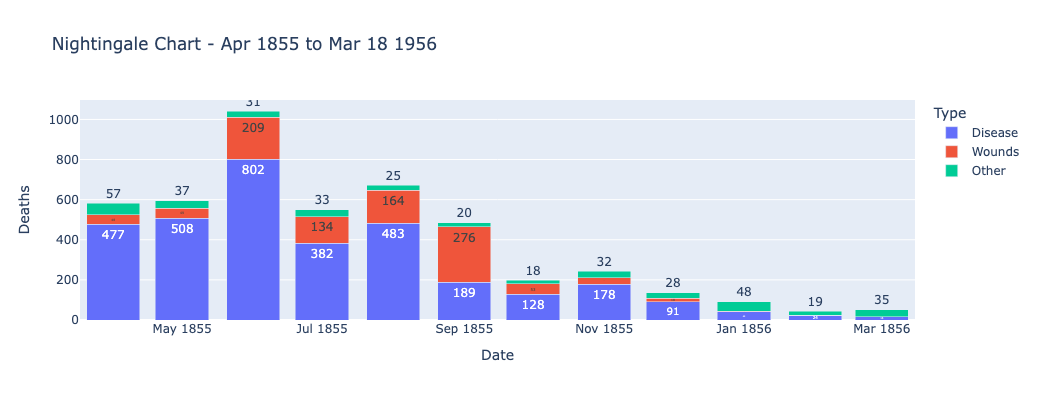

In [21]:
#double checking with the stacked bar chart

#using the melt function to get one column for category name
Nightviz1 = nightingdata2.melt(
    id_vars=['Date', 'Month', 'Year', 'Army'],
    value_vars=['Disease', 'Wounds','Other'],     # Grouping the types together
    var_name='Type',
    value_name='Deaths'
)

fig = px.bar(
    Nightviz1,
    x='Date',
    y='Deaths',
    color='Type',
    title='Nightingale Chart - Apr 1855 to Mar 18 1956',
    hover_data=['Type', 'Army']
)

fig.update_layout(
    width=800, 
    height=400,
    barmode='stack'  
)
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()
